In [1]:
from models.embedder_with_classification_head import EmbedderClassifier
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface
from models.embedder_with_classification_head.embedders import (
    SentenceTransformerEmbedder,
)
from models.embedder_with_classification_head.classification_heads import (
    NeuralNetClassifier,
    GenericSklearnCalssifier,
)

from datetime import datetime
from matplotlib.colors import ListedColormap

from sklearn.gaussian_process.kernels import RBF, ConstantKernel, DotProduct, Matern
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime


In [ ]:
config = {
    "solver": "adam",
    "random_state": 42,
    "max_iter": 500,
    "learning_rate_init": 0.0001,
    "hidden_layer_sizes": (64, 32),
    "early_stopping": False,
    "alpha": 0.01,
    "activation": "relu",
}


dataloader = AnnotationDataLoader()


embedder = SentenceTransformerEmbedder(r"pritamdeka/S-BioBert-snli-multinli-stsb")
classifier = GenericSklearnCalssifier(MLPClassifier, model_kwargs=config)
embedder_m = EmbedderClassifier(embedder, classifier)
embedder_m.train(dataloader.get_all_train(resample=True, class_ratio={0: 0.5, 1: 0.5, 2: 1}))



In [5]:
embedder_m.train(dataloader.get_all_train(resample=True, class_ratio={0: 0.5, 1: 0.5, 2: 1}))


Original Training Class Distribution: Counter({2: 4371, 0: 2185, 1: 2185})


In [6]:

embedder_m.model_info = str(config)
embedder_m.model_title = "Pretrained embedder"

In [ ]:
import pandas as pd
all_test_no_overlap_path = r"C:\Bioinfomatics\Integerated bioinformatics project\ViralAnnotationClassifier\data_loader\data\all_test_nooverlap.tsv"
all_test = pd.read_csv(all_test_no_overlap_path, sep="\t")

,protein_annotation,label
0,Kelch-like protein 20 (Kelch-like ECT2-interac...,2
1,Sodium/hydrogen exchanger,2
2,Regulatory inactivation of DnaA Hda protein,2
3,DNA helicase TraI type C-terminal domain-conta...,2
4,TubC N-terminal docking domain-containing protein,2
...,...,...
4250,"Putative phage major capsid protein, HK97 family",2
4251,SRAP domain containing protein,2
4252,"5'(3')-deoxyribonucleotidase, cytosolic type (...",2
4253,NAD(+) synthase (glutamine-hydrolyzing) (EC 6....,2


In [12]:
m = ModelEvaluator(embedder_m, all_test)
c_report = m.generate_report(include_probablities=True)


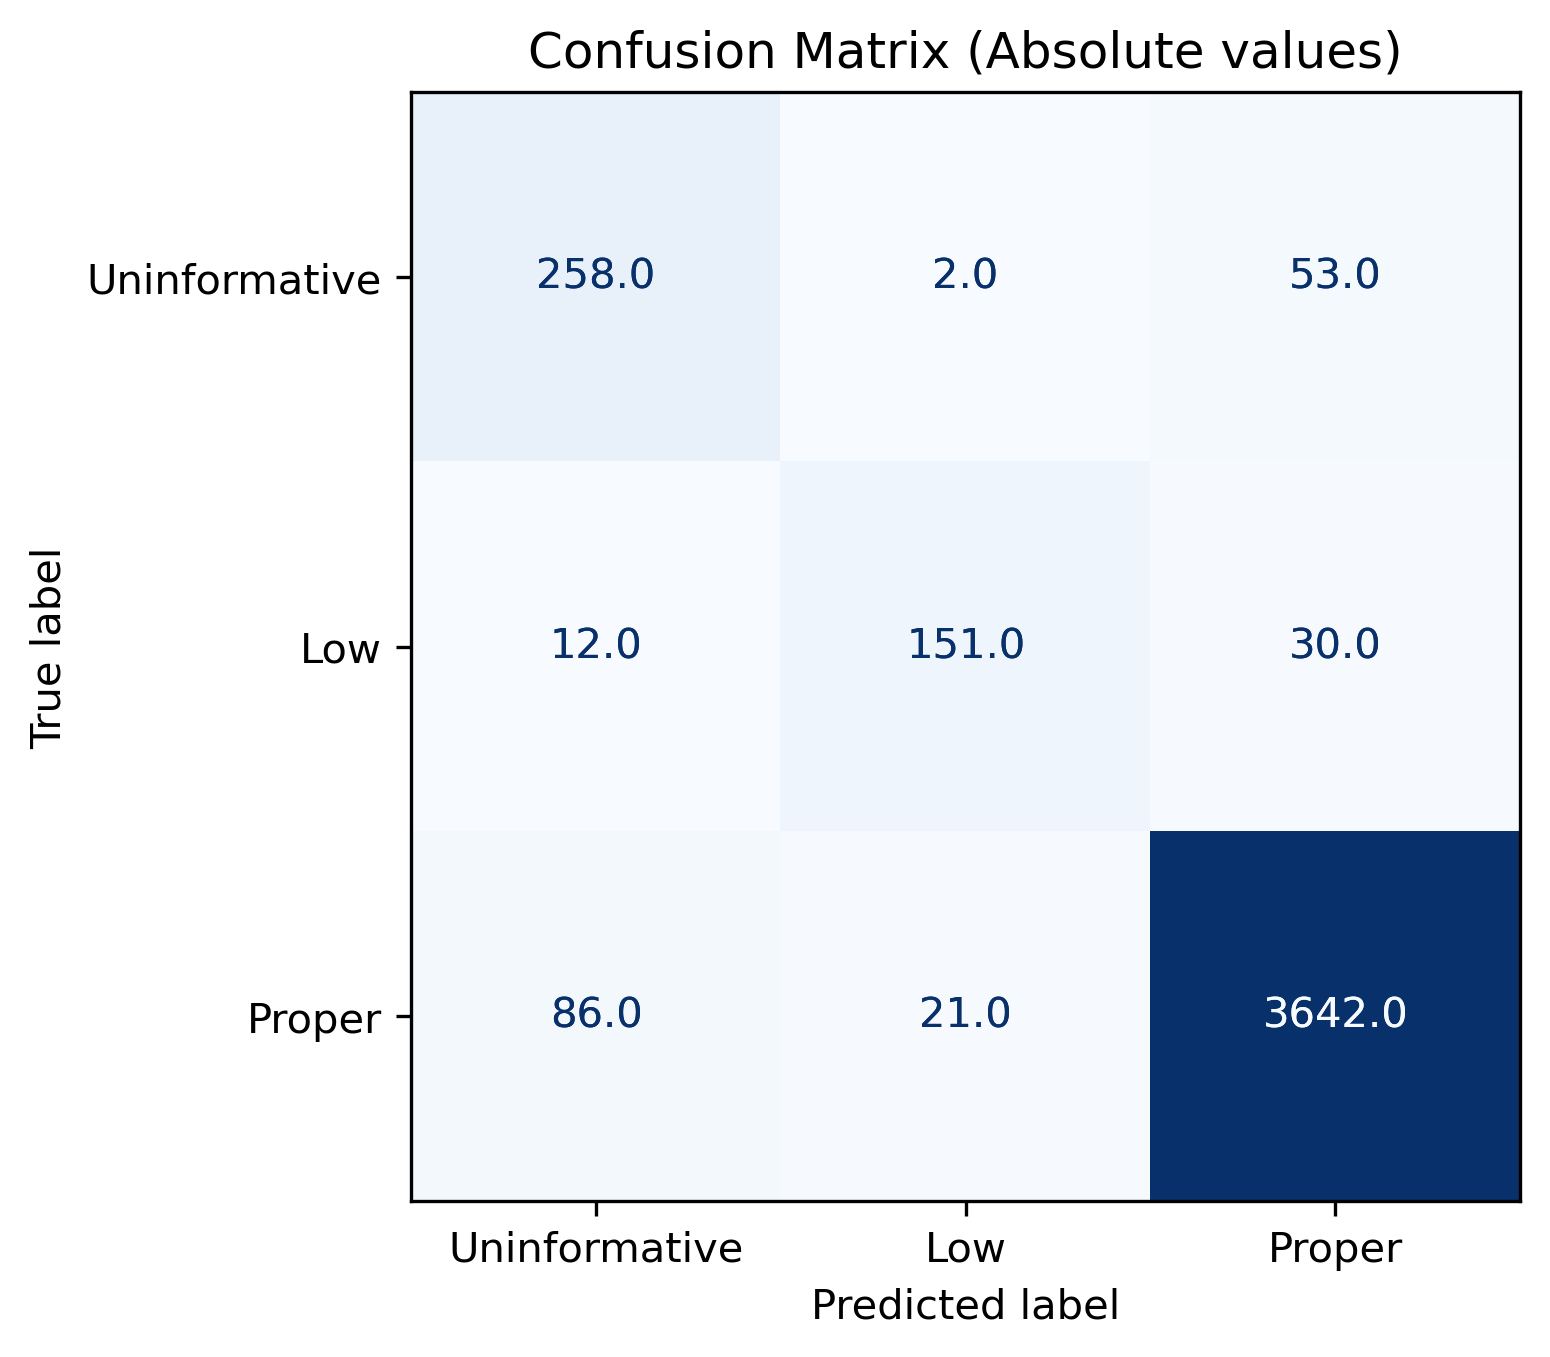
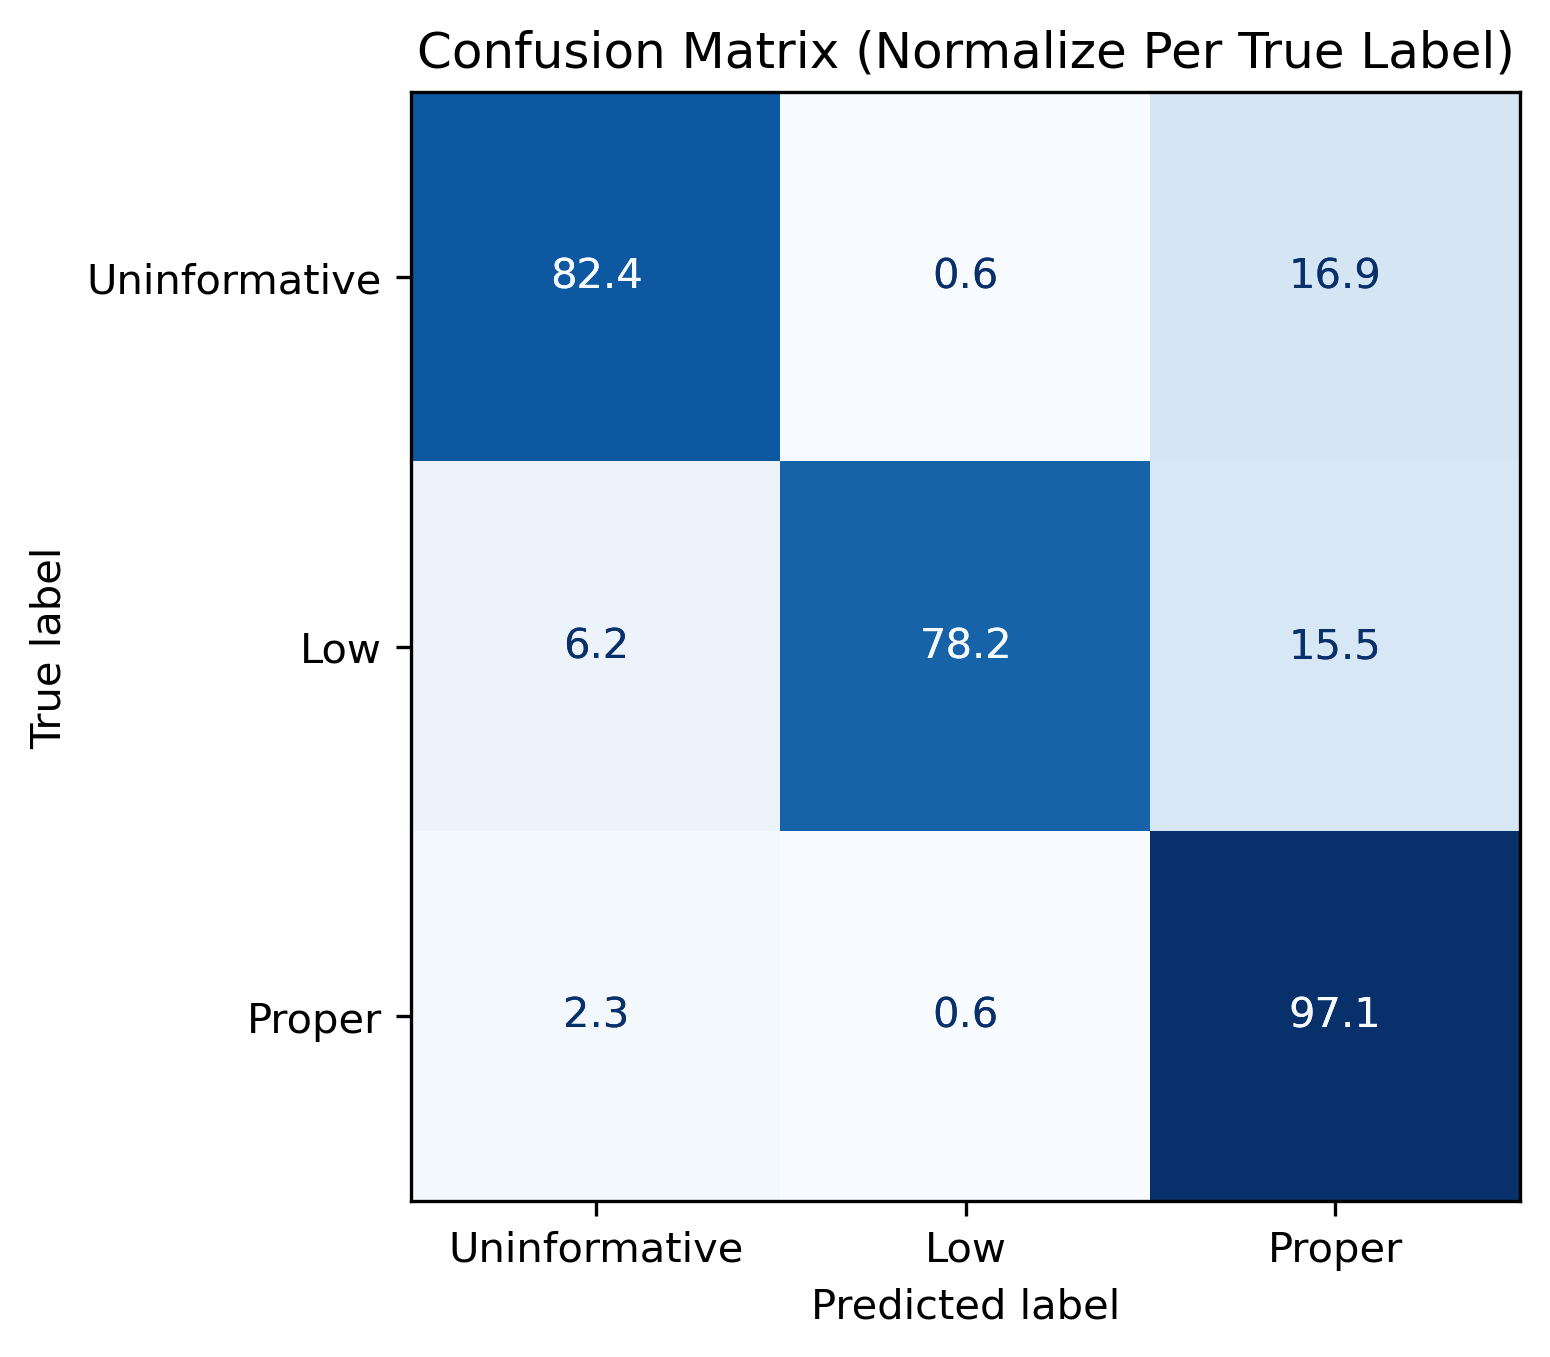

In [13]:
c_report.show_report()

In [17]:
import pickle 
with open(r"C:\Bioinfomatics\Integerated bioinformatics project\ViralAnnotationClassifier\final models\final_pretrainedembedder.pkl", "wb") as f:
    pickle.dump(embedder_m, f)

In [32]:
import pickle 

pretrained_embedder = {}
pretrained_embedder["classification_head"] = embedder_m._classification_head.model 
pretrained_embedder["embedder_name"] = r"pritamdeka/S-BioBert-snli-multinli-stsb"
    
    

In [34]:

with open(r"C:\Bioinfomatics\Integerated bioinformatics project\ViralAnnotationClassifier\final models\pretrained_embedder_dict_1.pkl", "wb") as f:
    pickle.dump(pretrained_embedder, f)


In [33]:
pretrained_embedder

{'classification_head': MLPClassifier(alpha=0.01, hidden_layer_sizes=(64, 32),
               learning_rate_init=0.0001, max_iter=500, random_state=42),
 'embedder_name': 'pritamdeka/S-BioBert-snli-multinli-stsb'}

In [18]:
import pickle 
with open(r"C:\Bioinfomatics\Integerated bioinformatics project\ViralAnnotationClassifier\final models\final_pretrainedembedder.pkl", "rb") as f:
    loaded = pickle.load(f)

In [20]:
m1 = ModelEvaluator(loaded, all_test)
c_report = m1.generate_report(include_probablities=True)


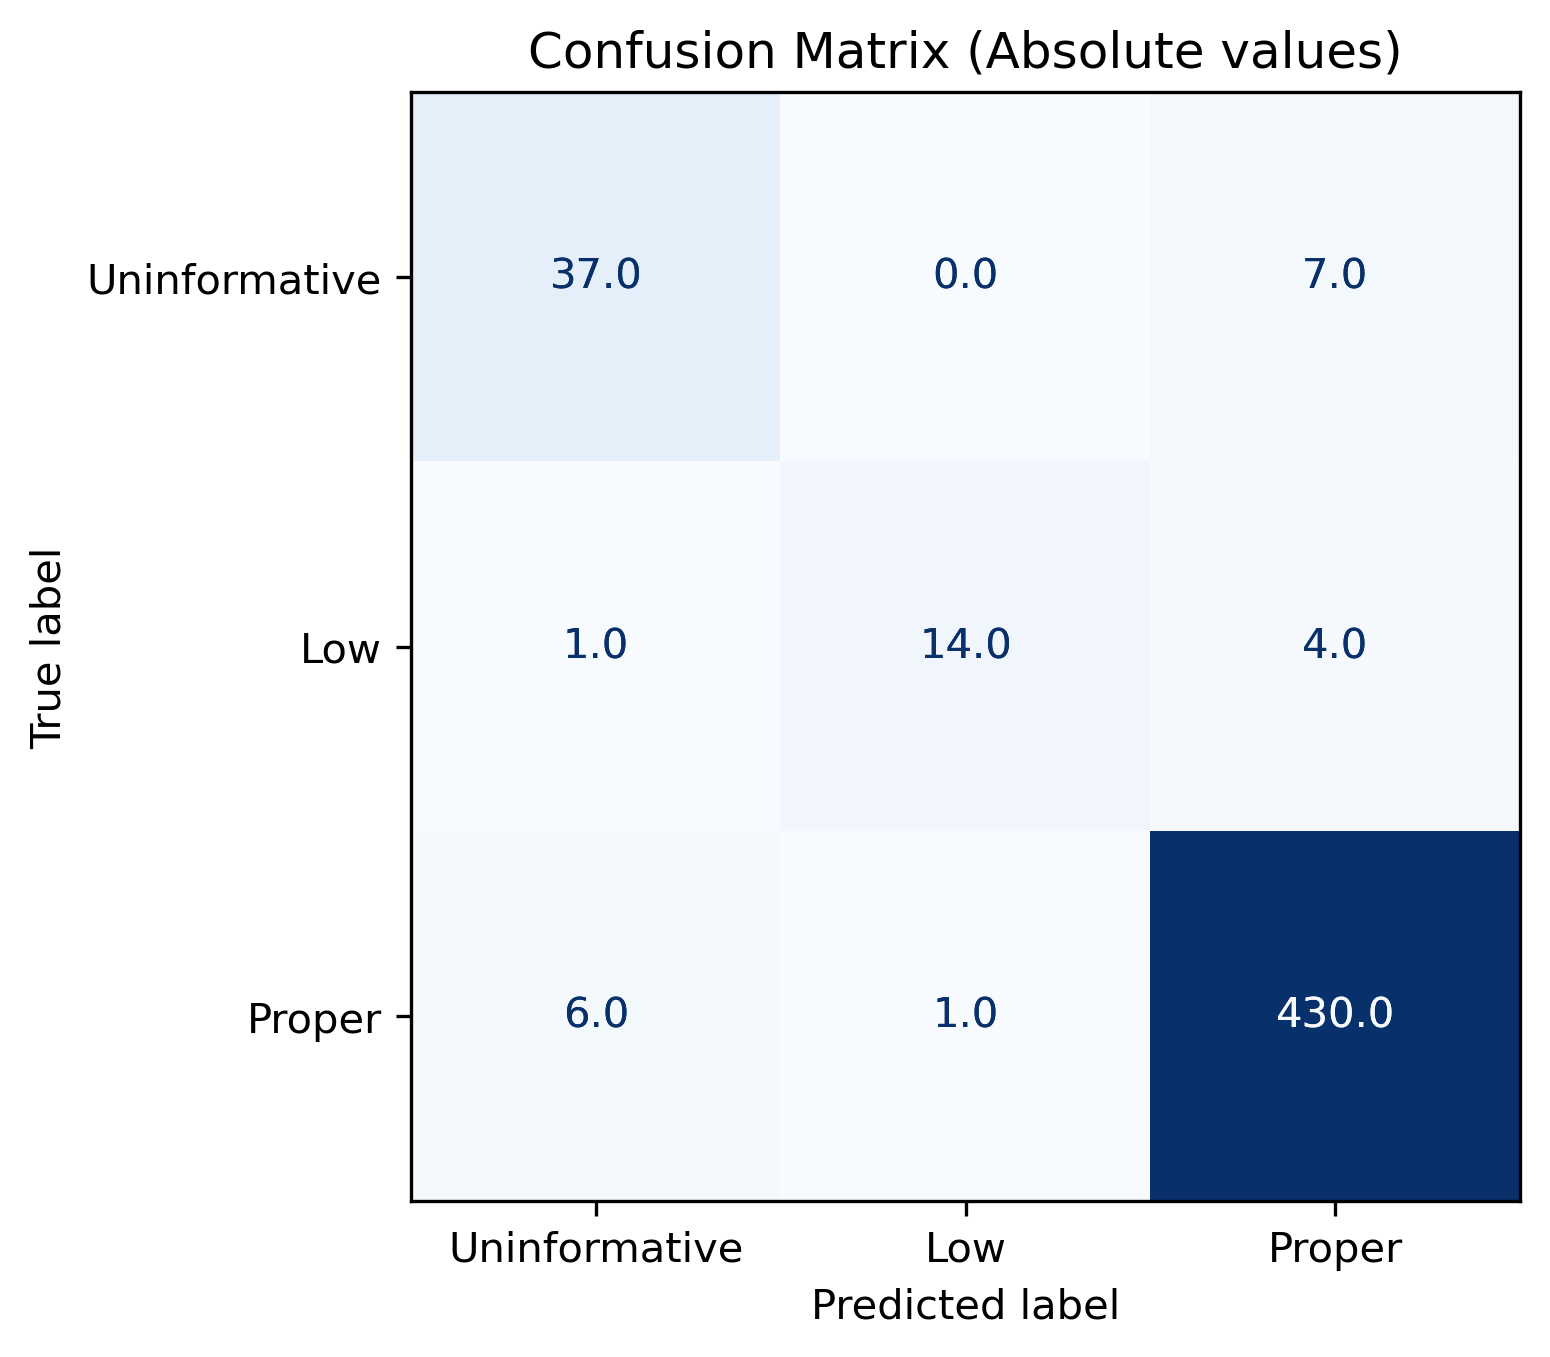
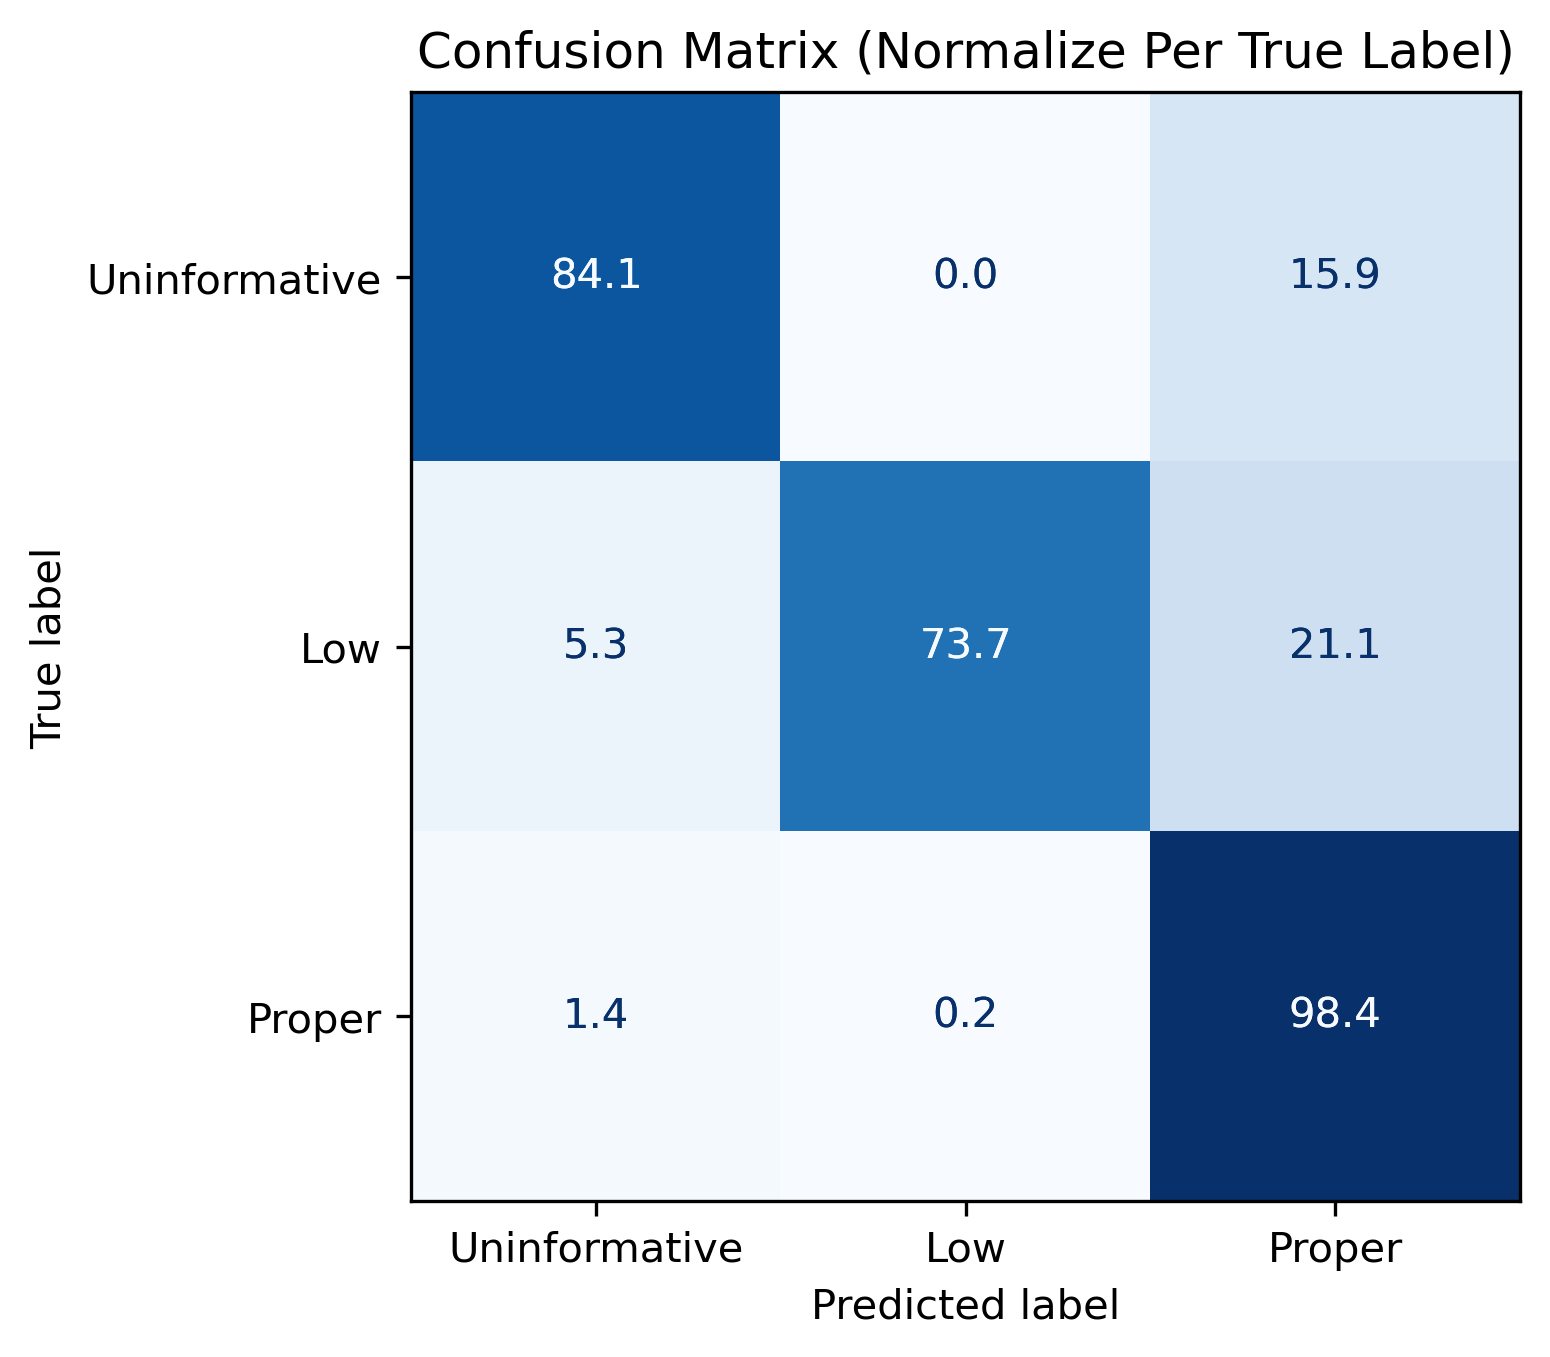

In [6]:
m = ModelEvaluator(embedder_m, dataloader.get_test())
c_report = m.generate_report(include_probablities=True)
c_report.show_report()